In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/customer_churn_data.csv')

In [3]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [4]:
X = pd.get_dummies(X, drop_first=True)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.48299319727891155


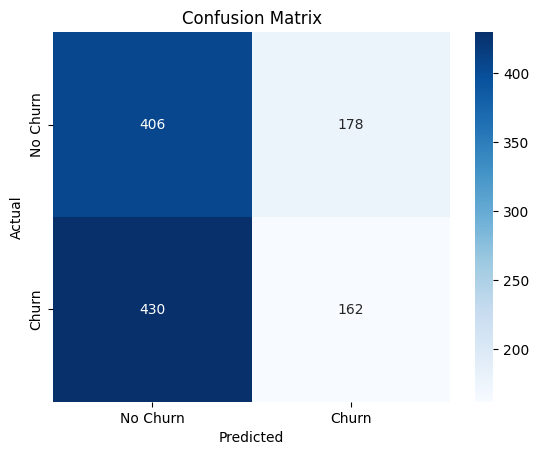

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.49      0.70      0.57       584
         Yes       0.48      0.27      0.35       592

    accuracy                           0.48      1176
   macro avg       0.48      0.48      0.46      1176
weighted avg       0.48      0.48      0.46      1176



In [12]:
original_features = ['tenure', 'Dependents', 'MonthlyCharges', 'TotalCharges']

In [13]:
new_data = [[10, 1, 75.0, 750.0],
            [5, 0, 60.0, 300.0],
            [2, 1, 80.0, 160.0]]

new_data_df = pd.DataFrame(new_data, columns=original_features)
print(new_data_df)


   tenure  Dependents  MonthlyCharges  TotalCharges
0      10           1            75.0         750.0
1       5           0            60.0         300.0
2       2           1            80.0         160.0


In [14]:
new_data_encoded = pd.get_dummies(new_data_df, columns=['Dependents'])

In [16]:
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

In [17]:
new_data_scaled = scaler.transform(new_data_encoded)
prediction = model.predict(new_data_scaled)

In [18]:
for pred in prediction:
    if pred == 1:  # Or if pred == 'Yes', depending on how your model encodes churn
        print("This customer is likely to churn.")
    else:
        print("This customer is unlikely to churn.")

This customer is unlikely to churn.
This customer is unlikely to churn.
This customer is unlikely to churn.
